- KNN 모델(k-Nearest Neighbors): 유유상종의 개념과 비슷
  - 새로운 데이터가 들어왔을 때, 거리계산을 통해서 가장 가까운 n개의 특성의 데이터로 예측하는 모델
- KNN 모델의 이웃의 숫자를 조정(하이퍼파라미터 튜닝) -> 일반화가 이루어지는 방향으로 조정

### 1. 문제정의(목표)
- 붓꽃의 4개의 특성을 통해 붓꽃의 품종을 예측하는 모델
- 특성 4개: 꽃잎의 길이와 너비, 꽃받침의 길이와 너비
- 정답: 클래스 3개 - 붓꽃의 3가지 품종(setosa, versicolor, virginica)

In [3]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# skLearn에서 지원하는 학습용 iris 데이터셋을 로드
from sklearn.datasets import load_iris

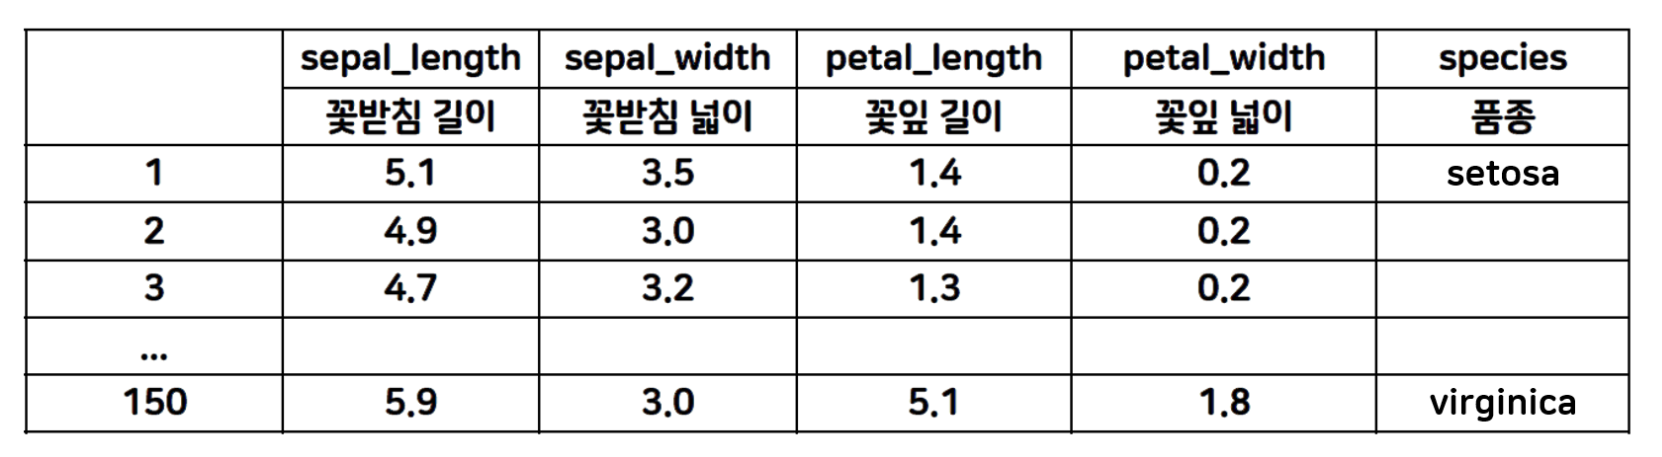

### 2. 데이터 수집
- 학습용으로 제작된 Iris 데이터를 로드

In [6]:
iris_data = load_iris()
iris_data

# iris_data: 번치 객체, 파이썬에서 딕셔너리와 비슷한 자료구조
# 번치 객체: 묶음, 다발이라는 의미: 머신러닝 데이터 셋 구조

# data: 문제 데이터
# target: 정답 데이터
# target_names: 정답 데이터의 이름
# feature_names: 특성의 이름(컬럼명)
# DESCR: 데이터셋에 대한 설명

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 3. 데이터 전처리
- 학습용 데이터이기 때문에 전처리는 필요 없음

### 4. 탐색적 데이터 분석
- 데이터의 구조를 확인해보자

In [9]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
iris_data.values()

dict_values([array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
 

In [11]:
iris_data['data'] # 문제 데이터가 들어가있는 key값 호출
# -> 문제 데이터

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
print(iris_data['feature_names'])
# 꽃받침 길이
# 꽃받침 너비
# 꽃잎의 길이
# 꽃잎의 너비

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
# 기술 통계량
# iris_data.describe()
# describe는 DataFrame의 메서드

In [16]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
# 문제 데이터와 정답 데이터 형태
iris_data['data'].shape

(150, 4)

In [18]:
iris_data['target'].shape

(150,)

- 데이터 프레임(DF) 형태로 문제 데이터를 변환해보자

In [20]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- 문제와 정답을 선언

In [22]:
X = iris_df # 문제데이터
y = iris_data['target'] # 정답데이터

- 학습, 평가 데이터로 최종 분리

In [24]:
y
# 그대로 iloc로 7:3으로 나누면 안됨

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# sklearn 내부에 랜덤 샘플링 도구를 불러옴
from sklearn.model_selection import train_test_split

In [26]:
# 알아서 훈련용과 테스트용 데이터를 나누어 주는 도구(랜덤 샘플링)
# train_test_split(문제, 정답, 평가데이터의 비율, 랜덤시드값)

# 순서 중요
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, # 테스트 데이터의 사이즈(7:3)
                                                    random_state=8) # 랜덤 시드 고정
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
49,5.0,3.3,1.4,0.2
43,5.0,3.5,1.6,0.6
40,5.0,3.5,1.3,0.3
139,6.9,3.1,5.4,2.1
111,6.4,2.7,5.3,1.9
...,...,...,...,...
83,6.0,2.7,5.1,1.6
136,6.3,3.4,5.6,2.4
133,6.3,2.8,5.1,1.5
105,7.6,3.0,6.6,2.1


#### train_test_split
1. train, test 분리
2. random sampling
   - 랜던 샘플링이 계속 되버리면, 학습 데이터가 변경되므로 하이퍼파라미터 조정의 의미가 없어짐
   - 랜덤 시드를 고정(수행시마다 동일한 샘플링 결과를 얻기 위해서)
   - 랜덤 시드는 큰 의미 없고, 내부적으로 규칙을 가지는 숫자

In [28]:
X_train.shape

(105, 4)

In [29]:
y_test.shape

(45,)

#### 산점도 매트릭스로 시각화 해보기
- x축과 y축에 특성을 넣고 출력하는 산점도 여러개를 한번에 출력
- 여러 특성 쌍의 관계를 동시에 확인할 수 있음
- 특성의 개수가 너무 많다면 확인하기 힘들어짐

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

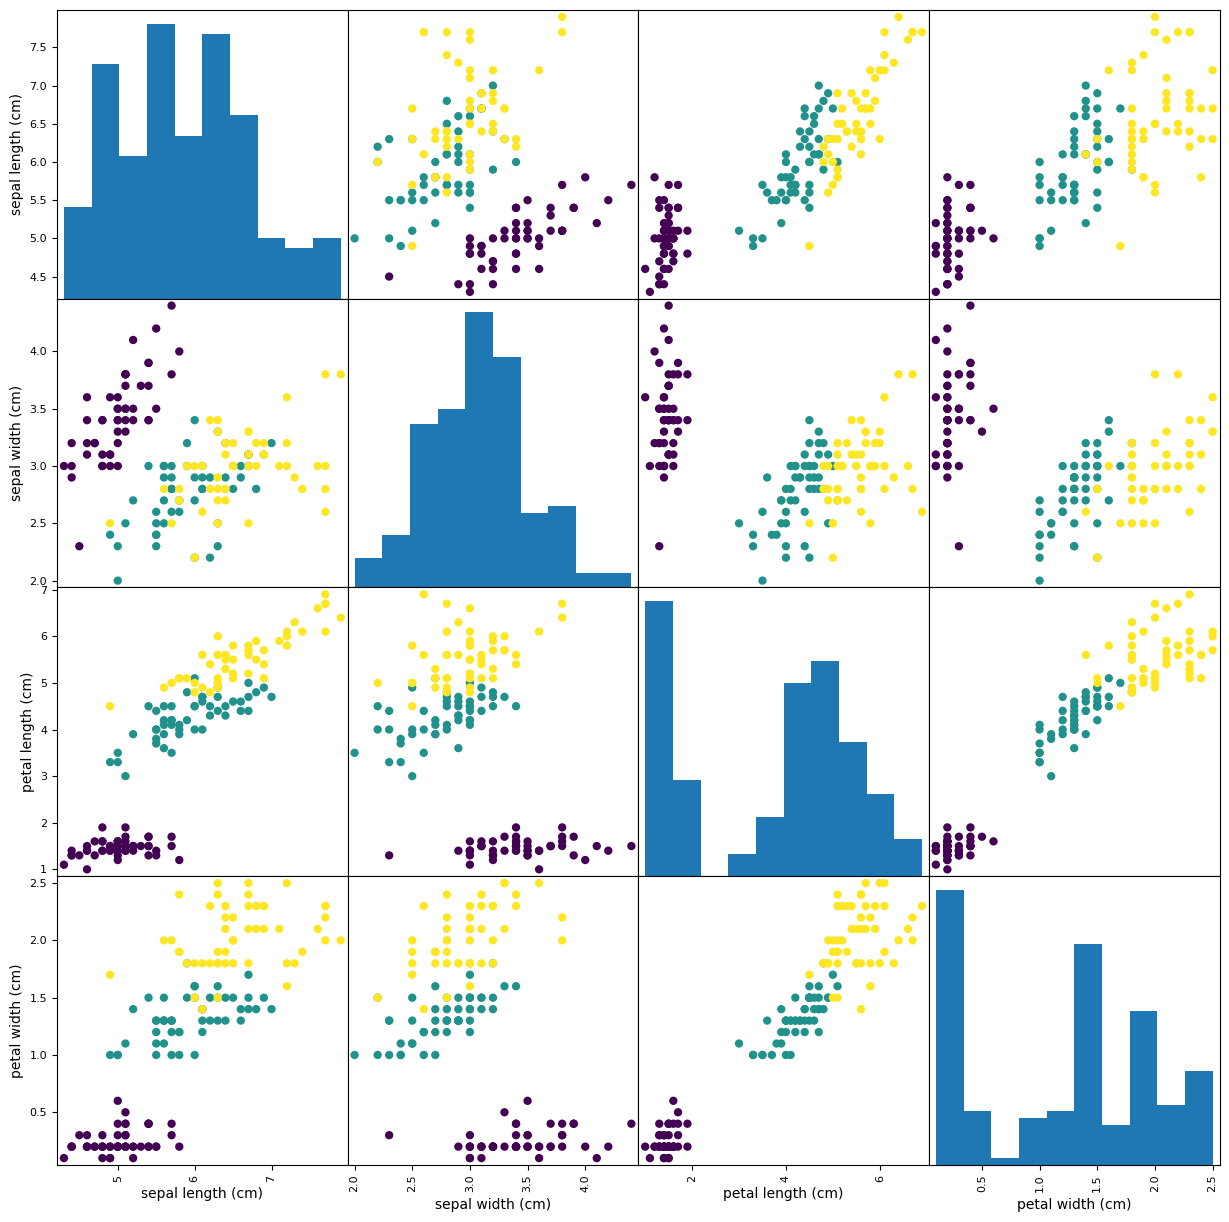

In [31]:
# 판다스에서 제공하는 산점도 매트릭스 생성
pd.plotting.scatter_matrix(iris_df,
                           figsize=(15, 15), # 매트릭스 사이즈 설정
                           marker='o', # 데이터의 표현 형태(o: 동그라미, s: 네모)
                           c= y, # 데이터의 색상 설정
                           alpha=1) # 매트릭스 투명도 설정(0: 투명, 1: 불투명)


### 5. 모델링(모델 선택, 학습, 평가)

In [33]:
# 1. 모델 정의
# 2. 모델 학습
# 3. 평가

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=13)

In [35]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [36]:
knn_model.score(X_train, y_train)

0.9714285714285714

In [37]:
knn_model.score(X_test, y_test)

0.9555555555555556

- 반복문을 활용하여 하이퍼파라미터 튜닝하기

In [40]:
train_list = [] # train 데이터의 정확도
test_list = [] # test 데이터의 정확도
# n_neighbors 1~49
# for, append

for i in range(1, 50, 1):
    # 모델 정의
    knn_model = KNeighborsClassifier(n_neighbors=i) # 하이퍼파라미터 k값을 1~49까지 넣어봄

    # 모델 학습
    knn_model.fit(X_train, y_train)

    # 훈련데이터의 예측 정확도를 리스트에 담기
    train_score = knn_model.score(X_train, y_train)
    train_list.append(train_score)

    # 평가데이터의 예측 정확도를 리스트에 담기
    test_score = knn_model.score(X_test, y_test)
    test_list.append(test_score)

In [42]:
train_list

[1.0,
 0.9904761904761905,
 0.9714285714285714,
 0.9809523809523809,
 0.9714285714285714,
 0.9619047619047619,
 0.9809523809523809,
 0.9619047619047619,
 0.9619047619047619,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9809523809523809,
 0.9714285714285714,
 0.9809523809523809,
 0.9714285714285714,
 0.9809523809523809,
 0.9619047619047619,
 0.9714285714285714,
 0.9523809523809523,
 0.9714285714285714,
 0.9619047619047619,
 0.9619047619047619,
 0.9523809523809523,
 0.9619047619047619,
 0.9619047619047619,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9619047619047619,
 0.9714285714285714,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9428571428571428,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9428571428571428,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428

In [44]:
test_list

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.8888888888888888,
 0.8888888888888888,
 0.9111111111

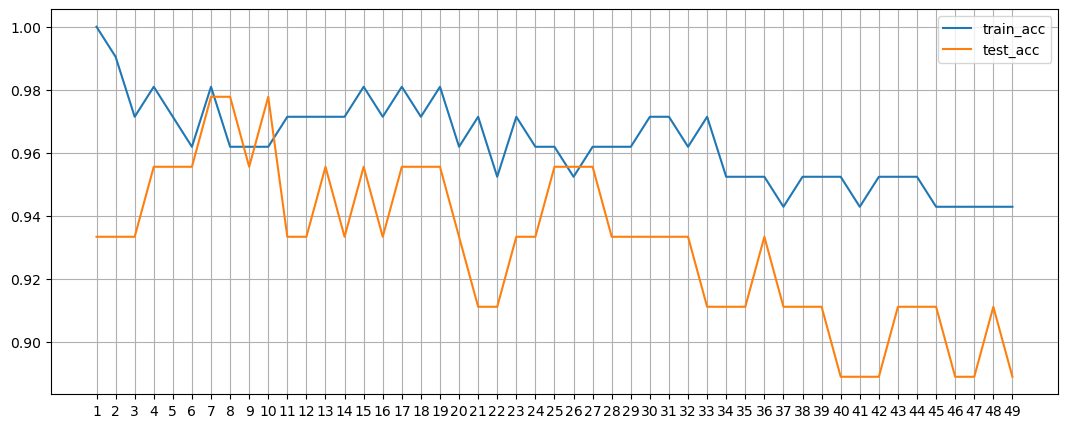

In [54]:
# 그래프를 그려서 확인해보자
# 각각의 하이퍼파라미터에 따른 훈련 데이터의 정확도, 테스트 데이터의 정확도를 그래프를 그려서
# 일반화가 되고 있는 최적점(하이퍼파라미터 값)이 어디인지 확인해보자

plt.figure(figsize=(13, 5))
plt.plot(range(1, 50, 1), train_list, label='train_acc')
# range(1, 50, 1): x축에 사용할 값
# train_list: y축에 사용할 값(k값에 따른 정확도)
# label='train_acc': 범례에 표시될 텍스트

plt.plot(range(1, 50, 1), test_list, label='test_acc')

plt.legend() # 범례
plt.grid() # 눈금선
plt.xticks(range(1, 50, 1)) # 눈금선의 간격 설정

plt.show()

In [56]:
# 모델 복잡도 곡선을 확인해본 결과, 하이퍼파라미터가 7, 8, 10일 때
# test 데이터의 예측 정확도가 가장 높은 걸 확인할 수 있음

# k = 8 or 10
# -> test 정확도 > train 정확도
# -> 신뢰성이 떨어지는 정확도

# k = 7
# test와 train의 정확도가 둘 다 높음, 차이 미비

# 모델을 생성할 때, 현재 우리가 가지고 있는 랜덤 샘플링된 데이터의 적합한 하이퍼파라미터는
# 7이라는 것을 알 수 있음